# US Accidents Exploratory Data Analysis

##### Information about data: Source- Kaggle Contains Information about Accidents in USA Useful to prevent accidents

### Download Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
import io
df = pd.read_csv('US_Accidents_Dec21_updated.csv')

### Data Preparation and Cleaning
##### --Load file using pandas -look at some information about the data & the column -fix any missing or incoreect values

In [12]:
df.shape

(2845342, 47)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [14]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

<AxesSubplot:>

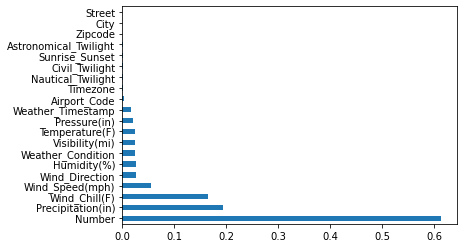

In [16]:
miss_percent=df.isna().sum().sort_values(ascending=False)/len(df)
miss_percent[miss_percent != 0].plot(kind='barh')

##### Remove columns that you don't want to use

In [17]:
df.drop('Precipitation(in)',axis=1,inplace=True)

In [18]:
df.drop('Wind_Chill(F)',axis=1,inplace=True)

In [19]:
df.drop('Number',axis=1,inplace=True)

## Exploratory Analysis and visualization

### Columns we will analyze

#### 1 City
#### 2 Start Time
#### 3 Start Lat, Start Long
#### 4 Temperature
#### 5 Weather Condition

### Which 20 cities have most number of accidents?

In [20]:
cities=df.City.unique()
len(cities)

11682

In [21]:
cities_by_accident=df.City.value_counts()
cities_by_accident.head(20)

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

<AxesSubplot:>

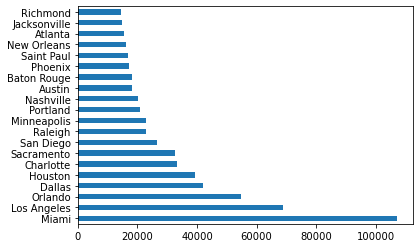

In [22]:
cities_by_accident[:20].plot(kind='barh')

In [23]:
import seaborn as sns
sns.set_style("darkgrid")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

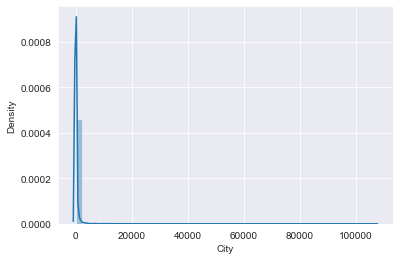

In [24]:
sns.distplot(cities_by_accident)

<AxesSubplot:xlabel='City', ylabel='Count'>

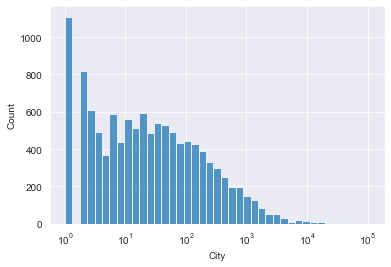

In [25]:
sns.histplot(cities_by_accident,log_scale=True)

In [26]:
cities_by_accident[cities_by_accident==1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

In [27]:
high_accident_cities=cities_by_accident[cities_by_accident>=1000]
low_accident_cities=cities_by_accident[cities_by_accident<1000]

In [28]:
len(high_accident_cities)/len(cities)

0.04245848313644924

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

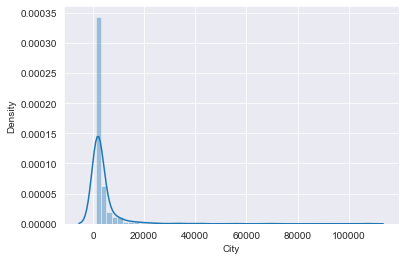

In [29]:
sns.distplot(high_accident_cities)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

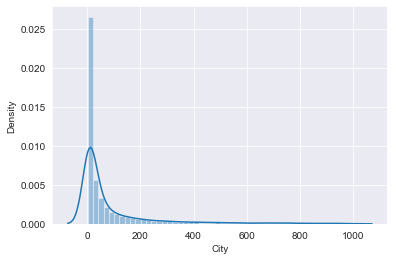

In [30]:
sns.distplot(low_accident_cities)

#### Start Time

In [31]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [32]:
df.Start_Time=pd.to_datetime(df.Start_Time)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

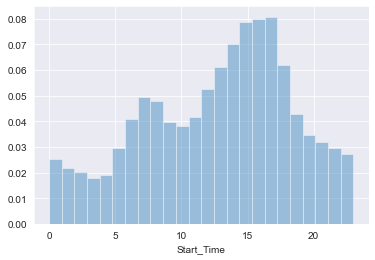

In [33]:
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False, norm_hist=True)

#####  - high perecentage of accidents occur between 3 PM -6 PM(probabaly because traffic is higher beacause people go to home from work.)
##### - Another time slot is 6 AM- 9 AM(probabaly because people leave for work in hurry)

<AxesSubplot:xlabel='Start_Time'>

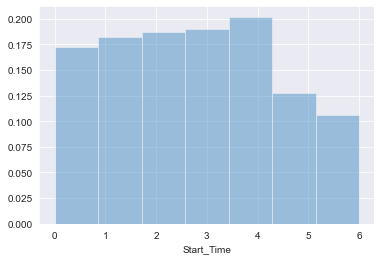

In [34]:
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False, norm_hist=True)

##### - On weekdays, the peak of accidents is in the evening between 4 PM to 6 Pm and in the morning between 6 AM to 9 AM.

#### Start Latitude and Longitude

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

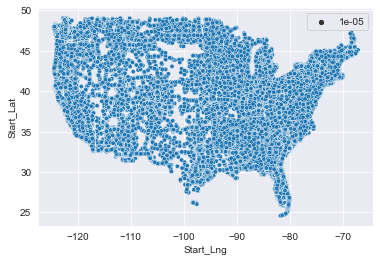

In [37]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat,size=0.00001)

In [41]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.776068e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,6.179356e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.862263e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,5.000000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,6.400000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03


### Are there more accidents is warmer or colder areas?

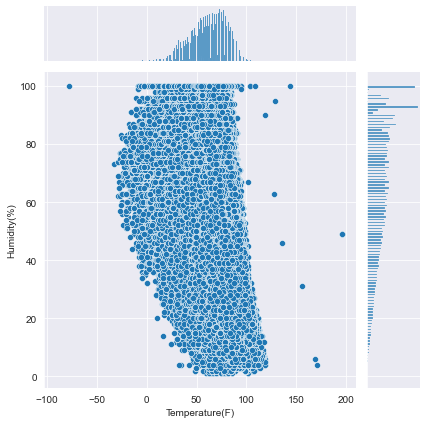

In [42]:
sns.jointplot(x=df['Temperature(F)'], y=df['Humidity(%)'])

<AxesSubplot:xlabel='Temperature(F)', ylabel='Humidity(%)'>

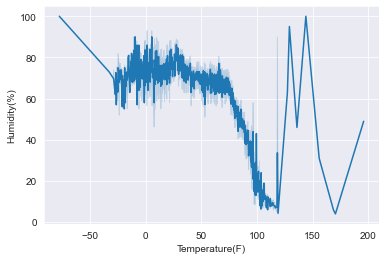

In [43]:
sns.lineplot(x=df['Temperature(F)'], y=df['Humidity(%)'])

##### From the above charts, We can say that there is relation between humidity and tempearture when accident occurs. Most of the accidents occurs when Humidity is high and Teperature is low. This can be Winter season when it is snowing. Other possible reason can be high temperature with low humidity.

### Which 5 States has highest number of accidents?

In [44]:
states=df.State.unique()
states_by_accident=df.State.value_counts()

In [45]:
top5_states=states_by_accident.head(5)
top5_states

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
Name: State, dtype: int64

In [46]:
states_by_accident_per_capita=(df.State.value_counts()/len(df))*100
states_by_accident_per_capita.head(10)

CA    27.970908
FL    14.106846
TX     5.237929
OR     4.440275
VA     3.990206
NY     3.797399
PA     3.513637
MN     3.415582
NC     3.210932
SC     3.135511
Name: State, dtype: float64

<AxesSubplot:>

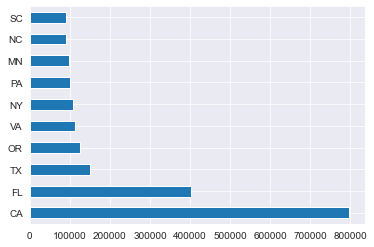

In [47]:
states_by_accident[:10].plot(kind='barh')

### Analysis for particulary 'New Jersey'

In [48]:
NJ_count=df.loc[df['State']=='NJ']
len(NJ_count)

52902

<AxesSubplot:>

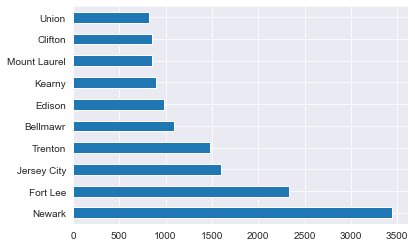

In [49]:
NJ_cities=NJ_count.City.value_counts()
NJ_cities[:10].plot(kind='barh')

### Summary and Conclusion

#### Insights

##### 1. New York has less than 5000 accidents per year inspite of being the most populated city in USA.
##### 2. There are more number of accidents around the coast.
##### 3. The number of accidents per city decreases exponentially.
##### 4. Less than 5% of cities have more than 1000 accidents.
##### 5. Over 1200 cities have reported just 1 accident. (needs to be investigated)
##### 6. Number of accidents are more when Humidity is high and Teperature is low and high temperature with low humidity.
##### 7. Newark city has highest number of accidents in New Jersey State.